In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal import Optimal
from v2.model import Trading
from v2.strategy.indicators.param import Param





/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing


In [2]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())
dataset = model.dfs[0][0]

In [3]:
optimal_penalty = Param(0, 0, 0, 'penalty', 0.0052)
optimal = Optimal(_params=[optimal_penalty], _name='optimal')
optimal.genData(dataset, gen_new_values=False)

In [4]:
def map_to_price_entry(row):
    if row.optimal > 0.75:
        return row.close
    else:
        return None

def map_to_price_exit(row):
    if row.optimal < -0.75:
        return row.close
    else:
        return None

In [5]:
dataset['optimal_entry'] = dataset.apply(lambda x: map_to_price_entry(x), axis=1)
dataset['optimal_exit'] = dataset.apply(lambda x: map_to_price_exit(x), axis=1)

In [6]:
dataset['close'].isnull().values.any()

False

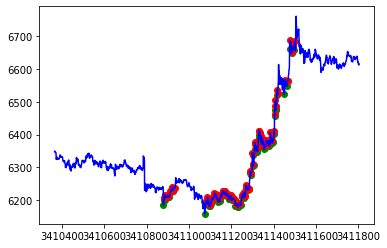

In [7]:
import matplotlib.pyplot as plt
plt.clf()
plt.scatter(x=dataset.index, y=dataset['optimal_entry'], color='green')
plt.scatter(x=dataset.index, y=dataset['optimal_exit'], color='red')
plt.plot(dataset.index, dataset['close'], color='blue')
plt.show()